In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
import pandas_profiling as pp

Adapted from: https://medium.com/@williamkoehrsen/data-analysis-with-python-19434f5d6324

In [2]:
# load csv files
batting = pd.read_csv('./core/Batting.csv')
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [3]:
# extract specific data from loaded csv's
years = [2010, 2011, 2012, 2013, 2014, 2015]
batting_by_years = batting[batting['yearID'].isin(years)]

In [4]:
batting_by_years = batting_by_years.groupby(['playerID', 'yearID'], as_index=False).sum()
batting_by_years.head(20)

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,aardsda01,2010,1,53,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,aardsda01,2012,1,1,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,aardsda01,2013,1,43,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,aardsda01,2015,1,33,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
4,abadfe01,2010,1,22,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
5,abadfe01,2011,1,29,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
6,abadfe01,2012,1,37,7,0,1,0,0,0,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,1.0
7,abadfe01,2013,1,39,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,abadfe01,2014,1,69,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
9,abadfe01,2015,1,62,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
batting_by_years.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,7800.000000,7800.000000,7800.000000,7800.000000,7800.000000,7800.000000,7800.000000,7800.000000,7800.000000,7800.000000,7800.000000,7800.000000,7800.000000,7800.000000,7800.000000,7800.000000,7800.000000,7800.000000,7800.000000
mean,2012.537821,1.179231,53.401923,127.369359,15.871282,32.394615,6.377821,0.673205,3.571154,15.096923,2.234487,0.850256,11.312564,27.797051,0.827692,1.203462,1.104615,0.964872,2.812308
std,1.707966,0.624687,46.414649,185.475364,25.604648,50.547457,10.354281,1.592472,7.068062,25.213551,6.023016,1.991812,19.111807,39.534384,2.307895,2.535353,2.253536,1.843066,4.834552
min,2010.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,1.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2013.000000,1.000000,35.000000,20.500000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2014.000000,1.000000,78.000000,206.000000,23.000000,49.000000,9.000000,1.000000,4.000000,21.000000,1.000000,1.000000,16.000000,44.000000,0.000000,1.000000,1.000000,1.000000,4.000000
max,2015.000000,10.000000,162.000000,684.000000,136.000000,225.000000,55.000000,16.000000,54.000000,139.000000,68.000000,23.000000,143.000000,222.000000,38.000000,30.000000,19.000000,12.000000,32.000000


In [6]:
batting_by_years.shape

(7800, 20)

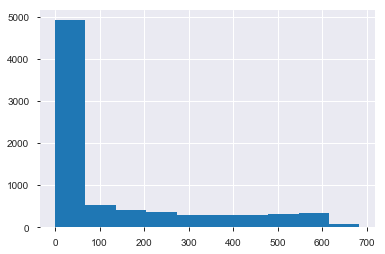

In [7]:
batting_by_years['AB'].hist()

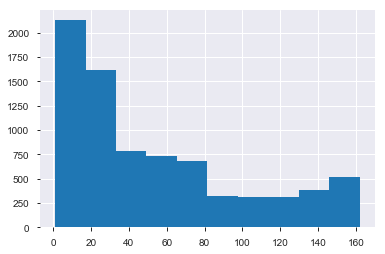

In [8]:
batting_by_years['G'].hist()

In [9]:
# filter to include only players with more than 20 games played and 20 at-bats
batting_by_years = batting_by_years[(batting_by_years['G'] >= 20) & 
                                    (batting_by_years['AB'] >= 20)]
batting_by_years.head(20)

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
10,abreubo01,2010,1,154,573,88,146,41,1,20,78.0,24.0,10.0,87,132.0,3.0,2.0,0.0,5.0,13.0
11,abreubo01,2011,1,142,502,54,127,30,1,8,60.0,21.0,5.0,78,113.0,5.0,1.0,1.0,3.0,8.0
12,abreubo01,2012,3,100,219,29,53,11,1,3,24.0,6.0,2.0,37,56.0,3.0,0.0,0.0,1.0,7.0
13,abreubo01,2014,1,78,133,12,33,9,0,1,14.0,1.0,0.0,20,21.0,0.0,0.0,0.0,2.0,3.0
14,abreujo02,2014,1,145,556,80,176,35,2,36,107.0,3.0,1.0,51,131.0,15.0,11.0,0.0,4.0,14.0
15,abreujo02,2015,1,154,613,88,178,34,3,30,101.0,0.0,0.0,39,140.0,11.0,15.0,0.0,1.0,16.0
17,abreuto01,2010,1,81,193,16,45,11,1,1,13.0,2.0,1.0,4,47.0,0.0,0.0,0.0,4.0,8.0
18,abreuto01,2012,1,22,70,5,18,2,1,1,15.0,0.0,0.0,2,13.0,0.0,1.0,0.0,1.0,1.0
19,abreuto01,2013,1,53,138,21,37,12,3,2,14.0,0.0,2.0,6,33.0,1.0,1.0,1.0,1.0,5.0
31,ackledu01,2011,1,90,333,39,91,16,7,6,36.0,6.0,0.0,40,79.0,1.0,0.0,0.0,3.0,3.0


In [10]:
# define a function that makes sure that only players that are in all five years are included
def find_players_in_all_years(records):
    # create list with all playerID's
    list_of_IDs = list(records['playerID'])
    all_years = set()
    
    # iterate through list of ID's and count how many times it occurs in the list
    for player in list_of_IDs:
        if (list_of_IDs.count(player)) == len(years):
            all_years.add(player)
            
    # return dataframe with players in all desired years
    return records[records['playerID'].isin(all_years)]


In [11]:
# create new dataframe using above function
batting_by_years_agg = find_players_in_all_years(batting_by_years)
batting_by_years_agg.head(20)

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
110,alonsyo01,2010,1,22,29,2,6,2,0,0,3.0,0.0,0.0,0,10.0,0.0,0.0,0.0,0.0,1.0
111,alonsyo01,2011,1,47,88,9,29,4,0,5,15.0,0.0,0.0,10,21.0,0.0,0.0,0.0,0.0,2.0
112,alonsyo01,2012,1,155,549,47,150,39,0,9,62.0,3.0,0.0,62,101.0,9.0,3.0,1.0,4.0,14.0
113,alonsyo01,2013,1,97,334,34,94,11,0,6,45.0,6.0,0.0,32,47.0,5.0,2.0,0.0,7.0,9.0
114,alonsyo01,2014,1,84,267,27,64,19,1,7,27.0,6.0,1.0,17,36.0,1.0,1.0,0.0,3.0,8.0
115,alonsyo01,2015,1,103,354,50,100,18,1,5,31.0,2.0,5.0,42,48.0,3.0,3.0,0.0,3.0,13.0
134,alvarpe01,2010,1,95,347,42,89,21,1,16,64.0,0.0,0.0,37,119.0,1.0,0.0,0.0,2.0,8.0
135,alvarpe01,2011,1,74,235,18,45,9,1,4,19.0,1.0,0.0,24,80.0,1.0,2.0,1.0,0.0,11.0
136,alvarpe01,2012,1,149,525,64,128,25,1,30,85.0,1.0,0.0,57,180.0,6.0,1.0,0.0,3.0,10.0
137,alvarpe01,2013,1,152,558,70,130,22,2,36,100.0,2.0,0.0,48,186.0,7.0,4.0,0.0,4.0,16.0


In [12]:
batting_by_years_agg.shape

(1092, 20)

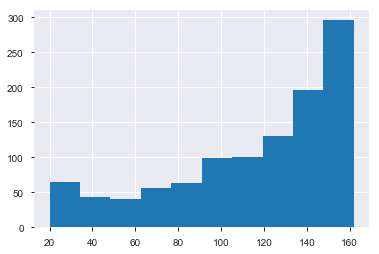

In [13]:
batting_by_years_agg['G'].hist()

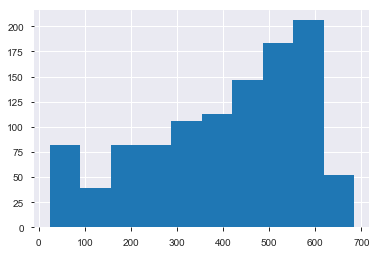

In [14]:
batting_by_years_agg['AB'].hist()

In [15]:
# sns.pairplot(batting_by_years_agg)

In [16]:
# import people csv
people = pd.read_csv('../baseballdatabank/core/People.csv',
                    usecols=['playerID','nameFirst','nameLast',
                            'bats','throws','debut'])

In [17]:
# set index so that we can join with batting data
people.set_index('playerID', inplace=True)

In [18]:
# join batting dataframe with other relavent info from people
batting_by_years_agg = batting_by_years_agg.join(people, on='playerID', how='inner')

In [19]:
batting_by_years_agg.isnull().sum()

playerID     0
yearID       0
stint        0
G            0
AB           0
R            0
H            0
2B           0
3B           0
HR           0
RBI          0
SB           0
CS           0
BB           0
SO           0
IBB          0
HBP          0
SH           0
SF           0
GIDP         0
nameFirst    0
nameLast     0
bats         0
throws       0
debut        0
dtype: int64

In [20]:
# create function that converts the bats and throws columns to numeric
def bats_throws(col):
    if col =='R':
        return 1
    else:
        return 0

In [21]:
# convert bats and throws columns
batting_by_years_agg['throws_R'] = batting_by_years_agg['throws'].apply(bats_throws)
batting_by_years_agg['bats_R'] = batting_by_years_agg['bats'].apply(bats_throws)
batting_by_years_agg.head()

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,throws_R,bats_R
110,alonsyo01,2010,1,22,29,2,6,2,0,0,3.0,0.0,0.0,0,10.0,0.0,0.0,0.0,0.0,1.0,Yonder,Alonso,L,R,2010-09-01,1,0
111,alonsyo01,2011,1,47,88,9,29,4,0,5,15.0,0.0,0.0,10,21.0,0.0,0.0,0.0,0.0,2.0,Yonder,Alonso,L,R,2010-09-01,1,0
112,alonsyo01,2012,1,155,549,47,150,39,0,9,62.0,3.0,0.0,62,101.0,9.0,3.0,1.0,4.0,14.0,Yonder,Alonso,L,R,2010-09-01,1,0
113,alonsyo01,2013,1,97,334,34,94,11,0,6,45.0,6.0,0.0,32,47.0,5.0,2.0,0.0,7.0,9.0,Yonder,Alonso,L,R,2010-09-01,1,0
114,alonsyo01,2014,1,84,267,27,64,19,1,7,27.0,6.0,1.0,17,36.0,1.0,1.0,0.0,3.0,8.0,Yonder,Alonso,L,R,2010-09-01,1,0


In [22]:
# create column for batting average
batting_by_years_agg['AVE'] = batting_by_years_agg['H'] / batting_by_years_agg['AB']

In [23]:
# compute plate appearances and on base percentage 
plate_appearances = batting_by_years_agg['AB'] + batting_by_years_agg['BB'] + batting_by_years_agg['SF'] + batting_by_years_agg['HBP']
batting_by_years_agg['OBP'] = (batting_by_years_agg['H'] + batting_by_years_agg['BB'] + batting_by_years_agg['HBP']) / plate_appearances

In [24]:
# create slugging percent column
single = ((batting_by_years_agg['H'] - batting_by_years_agg['2B']) - batting_by_years_agg['3B']) - batting_by_years_agg['HR']
batting_by_years_agg['Slug_Percent'] = ((batting_by_years_agg['HR'] * 4) +
                                        (batting_by_years_agg['3B'] * 3) +
                                        (batting_by_years_agg['2B'] * 2) +
                                        single) / batting_by_years_agg['AB']

In [25]:
# create on base plus slugging percent column
hr = batting_by_years_agg['HR'] * 4
triple = batting_by_years_agg['3B'] * 3
double = batting_by_years_agg['2B'] * 2
batting_by_years_agg['OPS'] =batting_by_years_agg['OBP'] + batting_by_years_agg['Slug_Percent']

In [26]:
batting_by_years_agg.head(20)

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS
110,alonsyo01,2010,1,22,29,2,6,2,0,0,3.0,0.0,0.0,0,10.0,0.0,0.0,0.0,0.0,1.0,Yonder,Alonso,L,R,2010-09-01,1,0,0.206897,0.206897,0.275862,0.482759
111,alonsyo01,2011,1,47,88,9,29,4,0,5,15.0,0.0,0.0,10,21.0,0.0,0.0,0.0,0.0,2.0,Yonder,Alonso,L,R,2010-09-01,1,0,0.329545,0.397959,0.545455,0.943414
112,alonsyo01,2012,1,155,549,47,150,39,0,9,62.0,3.0,0.0,62,101.0,9.0,3.0,1.0,4.0,14.0,Yonder,Alonso,L,R,2010-09-01,1,0,0.273224,0.347896,0.393443,0.741339
113,alonsyo01,2013,1,97,334,34,94,11,0,6,45.0,6.0,0.0,32,47.0,5.0,2.0,0.0,7.0,9.0,Yonder,Alonso,L,R,2010-09-01,1,0,0.281437,0.341333,0.368263,0.709597
114,alonsyo01,2014,1,84,267,27,64,19,1,7,27.0,6.0,1.0,17,36.0,1.0,1.0,0.0,3.0,8.0,Yonder,Alonso,L,R,2010-09-01,1,0,0.239700,0.284722,0.397004,0.681726
115,alonsyo01,2015,1,103,354,50,100,18,1,5,31.0,2.0,5.0,42,48.0,3.0,3.0,0.0,3.0,13.0,Yonder,Alonso,L,R,2010-09-01,1,0,0.282486,0.360697,0.381356,0.742052
134,alvarpe01,2010,1,95,347,42,89,21,1,16,64.0,0.0,0.0,37,119.0,1.0,0.0,0.0,2.0,8.0,Pedro,Alvarez,L,R,2010-06-16,1,0,0.256484,0.326425,0.461095,0.787520
135,alvarpe01,2011,1,74,235,18,45,9,1,4,19.0,1.0,0.0,24,80.0,1.0,2.0,1.0,0.0,11.0,Pedro,Alvarez,L,R,2010-06-16,1,0,0.191489,0.272031,0.289362,0.561392
136,alvarpe01,2012,1,149,525,64,128,25,1,30,85.0,1.0,0.0,57,180.0,6.0,1.0,0.0,3.0,10.0,Pedro,Alvarez,L,R,2010-06-16,1,0,0.243810,0.317406,0.466667,0.784073
137,alvarpe01,2013,1,152,558,70,130,22,2,36,100.0,2.0,0.0,48,186.0,7.0,4.0,0.0,4.0,16.0,Pedro,Alvarez,L,R,2010-06-16,1,0,0.232975,0.296417,0.473118,0.769535


In [27]:
batting_by_years_agg.isnull().sum()

playerID        0
yearID          0
stint           0
G               0
AB              0
R               0
H               0
2B              0
3B              0
HR              0
RBI             0
SB              0
CS              0
BB              0
SO              0
IBB             0
HBP             0
SH              0
SF              0
GIDP            0
nameFirst       0
nameLast        0
bats            0
throws          0
debut           0
throws_R        0
bats_R          0
AVE             0
OBP             0
Slug_Percent    0
OPS             0
dtype: int64

In [28]:
from datetime import datetime

In [29]:
# convert debut to datetime
batting_by_years_agg['debut'] = pd.to_datetime(batting_by_years_agg['debut'])

In [30]:
# create new columns for debutYear and finalYear 
batting_by_years_agg['debutYear'] = pd.to_numeric(batting_by_years_agg['debut'].dt.strftime('%Y'), errors='coerce')
batting_by_years_agg['currentYear'] = batting_by_years_agg['yearID'] 
batting_by_years_agg.head(20)

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,debutYear,currentYear
110,alonsyo01,2010,1,22,29,2,6,2,0,0,3.0,0.0,0.0,0,10.0,0.0,0.0,0.0,0.0,1.0,Yonder,Alonso,L,R,2010-09-01,1,0,0.206897,0.206897,0.275862,0.482759,2010,2010
111,alonsyo01,2011,1,47,88,9,29,4,0,5,15.0,0.0,0.0,10,21.0,0.0,0.0,0.0,0.0,2.0,Yonder,Alonso,L,R,2010-09-01,1,0,0.329545,0.397959,0.545455,0.943414,2010,2011
112,alonsyo01,2012,1,155,549,47,150,39,0,9,62.0,3.0,0.0,62,101.0,9.0,3.0,1.0,4.0,14.0,Yonder,Alonso,L,R,2010-09-01,1,0,0.273224,0.347896,0.393443,0.741339,2010,2012
113,alonsyo01,2013,1,97,334,34,94,11,0,6,45.0,6.0,0.0,32,47.0,5.0,2.0,0.0,7.0,9.0,Yonder,Alonso,L,R,2010-09-01,1,0,0.281437,0.341333,0.368263,0.709597,2010,2013
114,alonsyo01,2014,1,84,267,27,64,19,1,7,27.0,6.0,1.0,17,36.0,1.0,1.0,0.0,3.0,8.0,Yonder,Alonso,L,R,2010-09-01,1,0,0.239700,0.284722,0.397004,0.681726,2010,2014
115,alonsyo01,2015,1,103,354,50,100,18,1,5,31.0,2.0,5.0,42,48.0,3.0,3.0,0.0,3.0,13.0,Yonder,Alonso,L,R,2010-09-01,1,0,0.282486,0.360697,0.381356,0.742052,2010,2015
134,alvarpe01,2010,1,95,347,42,89,21,1,16,64.0,0.0,0.0,37,119.0,1.0,0.0,0.0,2.0,8.0,Pedro,Alvarez,L,R,2010-06-16,1,0,0.256484,0.326425,0.461095,0.787520,2010,2010
135,alvarpe01,2011,1,74,235,18,45,9,1,4,19.0,1.0,0.0,24,80.0,1.0,2.0,1.0,0.0,11.0,Pedro,Alvarez,L,R,2010-06-16,1,0,0.191489,0.272031,0.289362,0.561392,2010,2011
136,alvarpe01,2012,1,149,525,64,128,25,1,30,85.0,1.0,0.0,57,180.0,6.0,1.0,0.0,3.0,10.0,Pedro,Alvarez,L,R,2010-06-16,1,0,0.243810,0.317406,0.466667,0.784073,2010,2012
137,alvarpe01,2013,1,152,558,70,130,22,2,36,100.0,2.0,0.0,48,186.0,7.0,4.0,0.0,4.0,16.0,Pedro,Alvarez,L,R,2010-06-16,1,0,0.232975,0.296417,0.473118,0.769535,2010,2013


In [31]:
# create a years in the league up to that point column
batting_by_years_agg['YRSPRO'] = batting_by_years_agg['currentYear'] - batting_by_years_agg['debutYear']

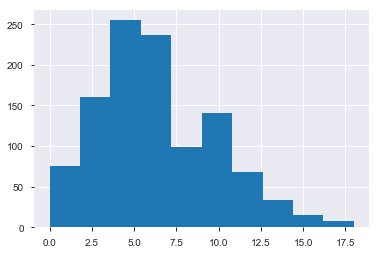

In [32]:
batting_by_years_agg['YRSPRO'].hist()

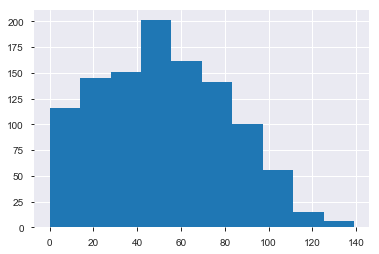

In [33]:
batting_by_years_agg['RBI'].hist()

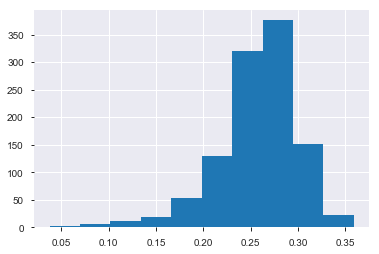

In [34]:
batting_by_years_agg['AVE'].hist()

In [35]:
batting_by_years_agg._get_numeric_data().columns

Index(['yearID', 'stint', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB',
       'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'throws_R',
       'bats_R', 'AVE', 'OBP', 'Slug_Percent', 'OPS', 'debutYear',
       'currentYear', 'YRSPRO'],
      dtype='object')

In [36]:
change_cols = ['G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB',
               'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP',
               'AVE', 'OBP', 'Slug_Percent', 'OPS']

percent_change = batting_by_years_agg[change_cols].pct_change().replace(np.inf, np.nan)

In [37]:
percent_change.head()

,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,AVE,OBP,Slug_Percent,OPS
110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,1.136364,2.034483,3.500000,3.833333,1.000000,NaN,NaN,4.000000,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,1.000000,0.592803,0.923469,0.977273,0.954214
112,2.297872,5.238636,4.222222,4.172414,8.750000,NaN,0.800000,3.133333,NaN,NaN,5.200000,3.809524,NaN,NaN,NaN,NaN,6.000000,-0.170906,-0.125799,-0.278689,-0.214195
113,-0.374194,-0.391621,-0.276596,-0.373333,-0.717949,NaN,-0.333333,-0.274194,1.0,NaN,-0.483871,-0.534653,-0.444444,-0.333333,-1.0,0.750000,-0.357143,0.030060,-0.018865,-0.063997,-0.042817
114,-0.134021,-0.200599,-0.205882,-0.319149,0.727273,NaN,0.166667,-0.400000,0.0,NaN,-0.468750,-0.234043,-0.800000,-0.500000,NaN,-0.571429,-0.111111,-0.148299,-0.165853,0.078043,-0.039277


In [38]:
# combine batting_by_years_agg and percent_change into a single dataframe
batter_and_change = pd.concat([batting_by_years_agg, percent_change.rename(columns={
    'G': 'G_chg', 
    'AB': 'AB_chg', 
    'R': 'R_chg', 
    'H': 'H_chg', 
    '2B': '2B_chg', 
    '3B': '3B-chg', 
    'HR': 'HR_chg', 
    'RBI': 'RBI_chg', 
    'SB': 'SB_chg',
    'CS': 'CS_chg', 
    'BB': 'BB_chg', 
    'SO': 'SO_chg', 
    'IBB': 'IBB_chg', 
    'HBP': 'HBP_chg', 
    'SH': 'SH_chg', 
    'SF': 'SF_chg', 
    'GIDP': 'GIDP_chg',
    'AVE': 'AVE_chg', 
    'OBP': 'OBP_chg', 
    'Slug_Percent': 'Slug_chg', 
    'OPS': 'OPS_chg'
})], axis=1)

In [39]:
# fill nan values with 0
batter_and_change.fillna(0, inplace=True)

In [40]:
batter_and_change.shape

(1092, 55)

In [42]:
# batter_and_change.to_csv('batter_and_change.csv')

In [42]:
batter_and_change.head(20)

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,debutYear,currentYear,YRSPRO,G_chg,AB_chg,R_chg,H_chg,2B_chg,3B-chg,HR_chg,RBI_chg,SB_chg,CS_chg,BB_chg,SO_chg,IBB_chg,HBP_chg,SH_chg,SF_chg,GIDP_chg,AVE_chg,OBP_chg,Slug_chg,OPS_chg
110,alonsyo01,2010,1,22,29,2,6,2,0,0,3.0,0.0,0.0,0,10.0,0.0,0.0,0.0,0.0,1.0,Yonder,Alonso,L,R,2010-09-01,1,0,0.206897,0.206897,0.275862,0.482759,2010,2010,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
111,alonsyo01,2011,1,47,88,9,29,4,0,5,15.0,0.0,0.0,10,21.0,0.0,0.0,0.0,0.0,2.0,Yonder,Alonso,L,R,2010-09-01,1,0,0.329545,0.397959,0.545455,0.943414,2010,2011,1,1.136364,2.034483,3.500000,3.833333,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,1.100000,0.000000,0.000000,0.000000,0.000000,1.000000,0.592803,0.923469,0.977273,0.954214
112,alonsyo01,2012,1,155,549,47,150,39,0,9,62.0,3.0,0.0,62,101.0,9.0,3.0,1.0,4.0,14.0,Yonder,Alonso,L,R,2010-09-01,1,0,0.273224,0.347896,0.393443,0.741339,2010,2012,2,2.297872,5.238636,4.222222,4.172414,8.750000,0.000000,0.800000,3.133333,0.000000,0.000000,5.200000,3.809524,0.000000,0.000000,0.000000,0.000000,6.000000,-0.170906,-0.125799,-0.278689,-0.214195
113,alonsyo01,2013,1,97,334,34,94,11,0,6,45.0,6.0,0.0,32,47.0,5.0,2.0,0.0,7.0,9.0,Yonder,Alonso,L,R,2010-09-01,1,0,0.281437,0.341333,0.368263,0.709597,2010,2013,3,-0.374194,-0.391621,-0.276596,-0.373333,-0.717949,0.000000,-0.333333,-0.274194,1.000000,0.000000,-0.483871,-0.534653,-0.444444,-0.333333,-1.000000,0.750000,-0.357143,0.030060,-0.018865,-0.063997,-0.042817
114,alonsyo01,2014,1,84,267,27,64,19,1,7,27.0,6.0,1.0,17,36.0,1.0,1.0,0.0,3.0,8.0,Yonder,Alonso,L,R,2010-09-01,1,0,0.239700,0.284722,0.397004,0.681726,2010,2014,4,-0.134021,-0.200599,-0.205882,-0.319149,0.727273,0.000000,0.166667,-0.400000,0.000000,0.000000,-0.468750,-0.234043,-0.800000,-0.500000,0.000000,-0.571429,-0.111111,-0.148299,-0.165853,0.078043,-0.039277
115,alonsyo01,2015,1,103,354,50,100,18,1,5,31.0,2.0,5.0,42,48.0,3.0,3.0,0.0,3.0,13.0,Yonder,Alonso,L,R,2010-09-01,1,0,0.282486,0.360697,0.381356,0.742052,2010,2015,5,0.226190,0.325843,0.851852,0.562500,-0.052632,0.000000,-0.285714,0.148148,-0.666667,4.000000,1.470588,0.333333,2.000000,2.000000,0.000000,0.000000,0.625000,0.178496,0.266837,-0.039415,0.088491
134,alvarpe01,2010,1,95,347,42,89,21,1,16,64.0,0.0,0.0,37,119.0,1.0,0.0,0.0,2.0,8.0,Pedro,Alvarez,L,R,2010-06-16,1,0,0.256484,0.326425,0.461095,0.787520,2010,2010,0,-0.077670,-0.019774,-0.160000,-0.110000,0.166667,0.000000,2.200000,1.064516,-1.000000,-1.000000,-0.119048,1.479167,-0.666667,-1.000000,0.000000,-0.333333,-0.384615,-0.092046,-0.095015,0.209094,0.061273
135,alvarpe01,2011,1,74,235,18,45,9,1,4,19.0,1.0,0.0,24,80.0,1.0,2.0,1.0,0.0,11.0,Pedro,Alvarez,L,R,2010-06-16,1,0,0.191489,0.272031,0.289362,0.561392,2010,2011,1,-0.221053,-0.322767,-0.571429,-0.494382,-0.571429,0.000000,-0.750000,-0.703125,0.000000,0.000000,-0.351351,-0.327731,0.000000,0.000000,0.000000,-1.000000,0.375000,-0.253407,-0.166636,-0.372447,-0.287139
136,alvarpe01,2012,1,149,525,64,128,25,1,30,85.0,1.0,0.0,57,180.0,6.0,1.0,0.0,3.0,10.0,Pedro,Alvarez,L,R,2010-06-16,1,0,0.243810,0.317406,0.466667,0.784073,2010,2012,2,1.013514,1.234043,2.555556,1.844444,1.777778,0.000000,6.500000,3.473684,0.000000,0.000000,1.375000,1.250000,5.000000,-0.500000,-1.000000,0.000000,-0.090909,0.273228,0.166803,0.612745,0.396657
137,alvarpe01,2013,1,152,558,70,130,22,2,36,100.0,2.0,0.0,48,186.0,7.0,4.0,0.0,4.0,16.0,Pedro,Alvarez,L,R,2010-06-16,1,0,0.232975,0.296417,0.473118,0.769535,2010,2013,3,0.020134,0.062857,0.093750,0.015625,-0.120000,1.000000,0.200000,0.176471,1.000000,0.000000,-0.157895,0.033333,0.166667,3.000000,0.000000,0.333333,0.600000,-0.044439,-0.066127,0.013825,-0.018541


In [ ]:
batter_and_change.columns

In [ ]:
attributes = ['G', 'AB', 'R', 'H', '2B', '3B', 'HR',
            'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 
            'SH', 'SF', 'GIDP', 'throws_R', 
            'bats_R', 'OBP', 'Slug_Percent', 'OPS', 
            'YRSPRO', 'G_chg', 'AB_chg', 'R_chg', 'H_chg',
            '2B_chg', '3B-chg', 'HR_chg', 'RBI_chg', 'SB_chg', 
            'CS_chg', 'BB_chg', 'SO_chg', 'IBB_chg', 'HBP_chg', 
            'SH_chg', 'SF_chg', 'GIDP_chg',
            'OBP_chg', 'Slug_chg', 'OPS_chg']

In [ ]:
# create dataframe without target
data_attributes = batter_and_change[attributes]
data_attributes.head(20)

In [ ]:
# import kmeans
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
# create silhouette score dict
s_score_dict = {}
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=42)
    l = km.fit_predict(data_attributes)
    s_score = metrics.silhouette_score(data_attributes, l)
    s_score_dict[i] = [s_score]
    
s_score_dict